In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
% pylab inline

Populating the interactive namespace from numpy and matplotlib


* Download tables from HEASARC by using [browse_extract_wget.pl](https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl) version 2a

Note that `pointing_mode = pointing` is used for XRT data.
This is due to truncated `resultmax = 420 000` and very large number of short-exposure slew observations.

In [88]:
### Uncomment below for downloading: 
# ! wget -q -nc https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl \
#     -O browse_extract_wget.pl

### 1st hemisphere
# ! perl ./browse_extract_wget.pl \
# table=swiftxrlog \
# position='0.,0.' \
# radius=5400 \
# coordinates=Galactic \
# fields=All \
# format=Text \
# resultmax=400000 \
# pointing_mode=pointing \
# operation_mode=PHOTON \
# outfile=xrt-obs-raw-1.csv

### 2nd hemisphere
# ! perl ./browse_extract_wget.pl \
# table=swiftxrlog \
# position='0.,180.' \
# radius=5400 \
# coordinates=Galactic \
# fields=All \
# format=Text \
# resultmax=400000 \
# pointing_mode=pointing \
# operation_mode=PHOTON \
# outfile=xrt-obs-raw-2.csv

In [97]:
# Final observation file size about 160 Mbytes (490k+ rows)
! wc xrt-obs-raw-?.csv

   251585   4095542  85034431 xrt-obs-raw-1.csv
   238888   3626640  80503961 xrt-obs-raw-2.csv
   490473   7722182 165538392 total


In [90]:
# It is written in txt format with '|' separator
! head -6 xrt-obs-raw-1.csv



Results from swiftxrlog
Coordinate system:galactic
|target_id|obsid      |_l       |_b       |start_time         |exposure  |window_size|operation_mode|pointing_mode|flipflop|bias|bii      |ccdtemp  |filename                   |integration_time|lii      |name                               |obs_segment|orig_obs_segment|orig_obsid |orig_target_id|roll_angle|stop_time          |_offset  |
|    92395|00092395053|  0.00071| -0.00112|2017-04-11T05:29:53|  476.9799|600x600    |PHOTON        |pointing     |N       |Y   | -0.00112|-56.63700|sw00092395053xpcw3po_uf.evt|         2.50730|  0.00071|GALACTICCENTER                     |         53|              53|00092395053|         92395|  98.89647|2017-04-11T05:37:53|   0.0795|


In [96]:
! tail -2 xrt-obs-raw-2.csv

|    49778|00049778010| 90.00230| 36.02324|2014-04-10T21:09:14| 639.3014|600x600    |PHOTON        |pointing     |N       |Y   | 36.02324|-59.16648|sw00049778010xpcw3po_uf.evt|         2.50730| 90.00230|NGC6307                            |         10|              10|00049778010|         49778|  49.20430|2014-04-10T21:19:56|5399.8884|
|    82962|00082962002|269.99607|-63.94632|2017-07-17T21:56:04| 526.9248|600x600    |PHOTON        |pointing     |N       |Y   |-63.94632|-63.76154|sw00082962002xpcw3po_uf.evt|         2.50730|269.99607|1RXSJ021411.4-473241               |          2|               2|00082962002|         82962|  76.57990|2017-07-17T22:04:53|5399.8964|


In [99]:
# converting to pandas dataset
data1 = pd.read_csv('xrt-obs-raw-1.csv', sep='|', header=0, skiprows=4, low_memory=False)
data1.head()

,Unnamed: 0,target_id,obsid,_l,_b,start_time,exposure,window_size,operation_mode,pointing_mode,...,lii,name,obs_segment,orig_obs_segment,orig_obsid,orig_target_id,roll_angle,stop_time,_offset,Unnamed: 25
0,NaN,92395,92395053,0.00071,-0.00112,2017-04-11T05:29:53,476.9799,600x600,PHOTON,pointing,...,0.00071,GALACTICCENTER,53,53,92395053,92395,98.89647,2017-04-11T05:37:53,0.0795,NaN
1,NaN,94007,94007020,0.00054,-0.00232,2018-04-23T21:59:09,998.9128,600x600,PHOTON,pointing,...,0.00054,GALACTICCENTER,20,20,94007020,94007,100.02661,2018-04-23T22:15:52,0.1429,NaN
2,NaN,92395,92395076,0.00244,-0.00125,2017-04-14T01:55:06,524.4279,600x600,PHOTON,pointing,...,0.00244,GALACTICCENTER,76,76,92395076,92395,99.79303,2017-04-14T02:03:52,0.1646,NaN
3,NaN,92395,92395075,359.99901,-0.00333,2017-04-13T22:36:29,501.9529,600x600,PHOTON,pointing,...,359.99901,GALACTICCENTER,75,75,92395075,92395,95.88698,2017-04-13T22:44:53,0.2085,NaN
4,NaN,91736,91736132,0.00223,-0.00317,2013-10-19T05:35:59,831.5952,600x600,PHOTON,pointing,...,0.00223,GALACTICCENTER,132,132,91736132,91736,263.91106,2013-10-19T05:49:55,0.2328,NaN


In [100]:
data2 = pd.read_csv('xrt-obs-raw-2.csv', sep='|', header=0, skiprows=4, low_memory=False)
data2.head()

,Unnamed: 0,target_id,obsid,_l,_b,start_time,exposure,window_size,operation_mode,pointing_mode,...,lii,name,obs_segment,orig_obs_segment,orig_obsid,orig_target_id,roll_angle,stop_time,_offset,Unnamed: 25
0,NaN,86248,86248003,180.09219,-0.30271,2018-02-07T08:56:26,147.3400,600x600,PHOTON,pointing,...,180.09219,OGP_3026,3,3,86248003,86248,261.85224,2018-02-07T08:58:54,18.9861,NaN
1,NaN,86248,86248003,180.09219,-0.30271,2018-02-07T21:35:32,199.7828,600x600,PHOTON,pointing,...,180.09219,OGP_3026,3,3,86248003,86248,261.85224,2018-02-07T21:38:53,18.9861,NaN
2,NaN,86248,86248003,180.09219,-0.30271,2018-02-07T16:43:48,124.8641,600x600,PHOTON,pointing,...,180.09219,OGP_3026,3,3,86248003,86248,261.85224,2018-02-07T16:45:53,18.9861,NaN
3,NaN,86248,86248002,180.10116,-0.30561,2018-02-02T12:21:33,379.5865,600x600,PHOTON,pointing,...,180.10116,OGP_3026,2,2,86248002,86248,271.81955,2018-02-02T12:27:55,19.3151,NaN
4,NaN,86248,86248002,180.10116,-0.30561,2018-02-02T10:47:44,307.1657,600x600,PHOTON,pointing,...,180.10116,OGP_3026,2,2,86248002,86248,271.81955,2018-02-02T10:52:53,19.3151,NaN


In [102]:
# correcting _offset for 2nd dataset
data2['_offset  '] = 180*60-data2['_offset  ']

In [118]:
# combine data1 and data2 to data
data = pd.concat([data1, data2])
data.tail()

,Unnamed: 0,Unnamed: 25,_b,_l,_offset,bias,bii,ccdtemp,exposure,exposure,...,operation_mode,orig_obs_segment,orig_obsid,orig_target_id,pointing_mode,roll_angle,start_time,stop_time,target_id,window_size
238878,NaN,NaN,36.02483,90.00307,5400.1492,Y,36.02483,-58.39507,439.5198,NaN,...,PHOTON,1,49778001,49778,pointing,47.93045,2013-04-11T12:44:34,2013-04-11T12:51:55,49778,600x600
238879,NaN,NaN,36.02324,90.00230,5400.1116,Y,36.02324,-57.38531,661.7754,NaN,...,PHOTON,10,49778010,49778,pointing,49.20430,2014-04-10T17:56:51,2014-04-10T18:07:55,49778,600x600
238880,NaN,NaN,36.02324,90.00230,5400.1116,Y,36.02324,-56.75254,636.8024,NaN,...,PHOTON,10,49778010,49778,pointing,49.20430,2014-04-10T19:33:16,2014-04-10T19:43:55,49778,600x600
238881,NaN,NaN,36.02324,90.00230,5400.1116,Y,36.02324,-59.16648,639.3014,NaN,...,PHOTON,10,49778010,49778,pointing,49.20430,2014-04-10T21:09:14,2014-04-10T21:19:56,49778,600x600
238882,NaN,NaN,-63.94632,269.99607,5400.1036,Y,-63.94632,-63.76154,526.9248,NaN,...,PHOTON,2,82962002,82962,pointing,76.57990,2017-07-17T21:56:04,2017-07-17T22:04:53,82962,600x600


In [119]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 25', '_b       ', '_l       ', '_offset  ',
       'bias', 'bii      ', 'ccdtemp  ', 'exposure ', 'exposure  ',
       'filename                   ', 'flipflop', 'integration_time',
       'lii      ', 'name                               ', 'obs_segment',
       'obsid      ', 'operation_mode', 'orig_obs_segment', 'orig_obsid ',
       'orig_target_id', 'pointing_mode', 'roll_angle', 'start_time         ',
       'stop_time          ', 'target_id', 'window_size'],
      dtype='object')

In [124]:
data['exposure '] = data['exposure '].fillna(0)
data['exposure  '] = data['exposure  '].fillna(0)
data['exposure'] = data['exposure '] + data['exposure  ']
data = data.drop(['exposure ', 'exposure  '], axis=1)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490463 entries, 0 to 238882
Data columns (total 26 columns):
Unnamed: 0                             0 non-null float64
Unnamed: 25                            0 non-null float64
_b                                     490463 non-null float64
_l                                     490463 non-null float64
_offset                                490463 non-null float64
bias                                   490463 non-null object
bii                                    490463 non-null float64
ccdtemp                                490463 non-null float64
filename                               490463 non-null object
flipflop                               490463 non-null object
integration_time                       490463 non-null object
lii                                    490463 non-null float64
name                                   490463 non-null object
obs_segment                            490463 non-null int64
obsid                   

In [126]:
# shorted column names for simplicity
r = []
for col in data.columns:
    r.append(col.replace(' ', ''))
data.columns = r

In [127]:
data.columns

Index(['Unnamed:0', 'Unnamed:25', '_b', '_l', '_offset', 'bias', 'bii',
       'ccdtemp', 'filename', 'flipflop', 'integration_time', 'lii', 'name',
       'obs_segment', 'obsid', 'operation_mode', 'orig_obs_segment',
       'orig_obsid', 'orig_target_id', 'pointing_mode', 'roll_angle',
       'start_time', 'stop_time', 'target_id', 'window_size', 'exposure'],
      dtype='object')

In [129]:
for col in ['exposure', '_offset', '_l', '_b']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [130]:
data.describe()

,Unnamed:0,Unnamed:25,_b,_l,_offset,bii,ccdtemp,lii,obs_segment,obsid,orig_obs_segment,orig_obsid,orig_target_id,roll_angle,target_id,exposure
count,0.0,0.0,490463.000000,490463.000000,490463.000000,490463.000000,490463.000000,490463.000000,490463.000000,4.904630e+05,490463.000000,4.904630e+05,4.904630e+05,490463.000000,4.904630e+05,490463.000000
mean,NaN,NaN,1.397262,185.037933,5270.235873,1.397262,-58.534243,185.037933,14.435796,1.921366e+08,14.005980,1.923575e+08,1.923574e+05,182.702296,1.921366e+05,615.534212
std,NaN,NaN,40.492720,104.074817,2291.671016,40.492720,3.881318,104.074817,32.542400,7.924484e+08,30.026442,7.931504e+08,7.931504e+05,101.375642,7.924484e+05,534.960815
min,NaN,NaN,-89.549860,0.000260,0.079500,-89.549860,-79.469390,0.000260,0.000000,1.000000e+07,0.000000,1.000000e+03,1.000000e+00,0.000010,1.000000e+04,2.497200
25%,NaN,NaN,-31.892040,96.144640,3780.669800,-31.892040,-60.929095,96.144640,1.000000,3.516901e+07,1.000000,3.516000e+07,3.516000e+04,91.732550,3.516900e+04,147.339400
50%,NaN,NaN,-0.053520,181.826630,5308.810000,-0.053520,-58.526880,181.826630,4.000000,4.969400e+07,4.000000,4.966901e+07,4.966900e+04,186.649480,4.969400e+04,514.440400
75%,NaN,NaN,34.426190,279.973030,7035.844100,34.426190,-56.125890,279.973030,12.000000,9.138201e+07,11.000000,9.135300e+07,9.135300e+04,273.861650,9.138200e+04,948.965800
max,NaN,NaN,89.532850,359.999900,10781.013900,89.532850,-41.618290,359.999900,991.000000,7.400021e+09,255.000000,7.400021e+09,7.400021e+06,359.998800,7.400021e+06,15345.803600


In [131]:
filtered_data = data[['obsid', 'exposure', '_offset', '_l', '_b']]
filtered_data = filtered_data.dropna(axis=0, how='any')
filtered_data.head()

,obsid,exposure,_offset,_l,_b
0,92395053,476.9799,0.0795,0.00071,-0.00112
1,94007020,998.9128,0.1429,0.00054,-0.00232
2,92395076,524.4279,0.1646,0.00244,-0.00125
3,92395075,501.9529,0.2085,359.99901,-0.00333
4,91736132,831.5952,0.2328,0.00223,-0.00317


In [132]:
# group exposure by off-center angle _offset by making $10^\circ$ bins
dr = 10
filtered_data['raw_offset'] = filtered_data['_offset'].apply(lambda x: math.floor(x/(60.0*dr))*dr)
filtered_data.head()

binned_time = filtered_data.groupby('raw_offset').agg(sum)[['exposure']]

In [133]:
filtered_data.tail()

,obsid,exposure,_offset,_l,_b,raw_offset
238878,49778001,439.5198,5400.1492,90.00307,36.02483,90
238879,49778010,661.7754,5400.1116,90.00230,36.02324,90
238880,49778010,636.8024,5400.1116,90.00230,36.02324,90
238881,49778010,639.3014,5400.1116,90.00230,36.02324,90
238882,82962002,526.9248,5400.1036,269.99607,-63.94632,90


In [134]:
binned_time

,exposure
raw_offset,
0,8.533953e+06
10,6.592373e+06
20,9.489536e+06
30,8.955034e+06
40,1.437328e+07
50,1.890339e+07
60,2.279383e+07
70,2.582912e+07
80,3.420117e+07


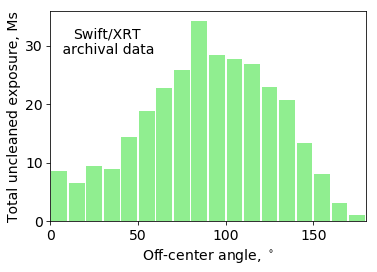

In [136]:
plt.xlim([0., 180.])
plt.bar(np.array(binned_time.index + 5), 
        1e-6*np.array(binned_time), 
        width=9.0, color='lightgreen')
#plt.legend(['DETB', 'DETA'])
plt.xlabel('Off-center angle, ${}^\circ$', size=14)
plt.ylabel('Total uncleaned exposure, Ms', size=14)
plt.tick_params(axis ='both', which='major', length=4, labelsize =14, color='black')
plt.tick_params(axis ='both', which='minor', length=0)
plt.figtext(x=0.28, y=0.73, s='Swift/XRT\n archival data', ha='center', size=14, color='black')
plt.subplots_adjust(left=0.15, right=0.88, top=0.88, bottom=0.15)

plt.savefig("xrt-uncleaned-exposure.pdf", format="pdf", transparent=True,rasterized=True,dpi=300, pad_inches=1)

Selecting only requested columns (pointing ID, exposures, coords, category -- cluster, galaxy etc)

In [ ]:
filtered_data.head()

In [140]:
filtered_data.to_csv('filtered_data_xrt.csv')
! wc filtered_data_xrt.csv
! gzip filtered_data_xrt.csv
! ls -lh filtered_data_xrt.csv.gz

  490464   490464 30355989 filtered_data_xrt.csv
-rw-r--r-- 1 dima806 dima806 5.8M Apr 26 17:56 filtered_data_xrt.csv.gz
